<a href="https://colab.research.google.com/github/ruthujapatil/ruthujapatil/blob/main/Assignment(Updated)_SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
dataset=pd.read_csv('/content/delivery_time.csv')

In [3]:
df_pd=pd.DataFrame(dataset)

In [4]:
df_pd.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df_pd.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
df_pd.columns=['DeliveryTime','SortingTime']

In [8]:
df_pd.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [9]:
df_pd.skew()

DeliveryTime    0.352390
SortingTime     0.047115
dtype: float64

<ipython-input-10-d8b287e299a1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pd['DeliveryTime'])


<Axes: xlabel='DeliveryTime', ylabel='Density'>

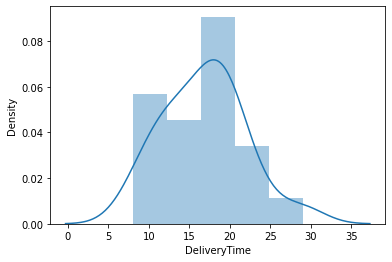

In [10]:
import seaborn as sns
sns.distplot(df_pd['DeliveryTime'])

After log transformation ,skewness is -0.451




<ipython-input-27-0c0014a8614d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pd['DeliveryTime_Log'])


<Axes: xlabel='DeliveryTime_Log', ylabel='Density'>

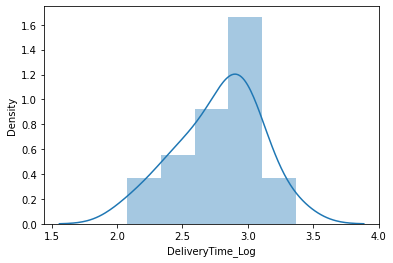

In [27]:
#Log Transformation   ----to reduce the skewness and normalise the data 
df_pd['DeliveryTime_Log']=np.log(df_pd['DeliveryTime'])
print('After log transformation ,skewness is',df_pd['DeliveryTime_Log'].skew().round(3))
print('\n')
sns.distplot(df_pd['DeliveryTime_Log'])

After log transformation ,skewness is -0.062




<ipython-input-12-c7db5999b677>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pd['DeliveryTime_Sqrt'])


<Axes: xlabel='DeliveryTime_Sqrt', ylabel='Density'>

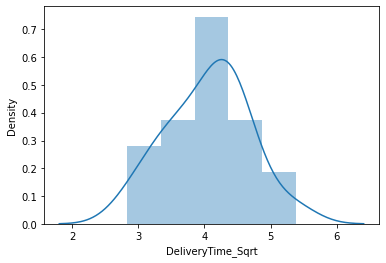

In [12]:
#square_root Transformation   ---- normalise the data 
df_pd['DeliveryTime_Sqrt']=np.sqrt(df_pd['DeliveryTime'])
print('After log transformation ,skewness is',df_pd['DeliveryTime_Sqrt'].skew().round(3))
print('\n')
sns.distplot(df_pd['DeliveryTime_Sqrt'])

After log transformation ,skewness is -0.194




<ipython-input-13-29420bc78f7a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pd['DeliveryTime_cbrt'])


<Axes: xlabel='DeliveryTime_cbrt', ylabel='Density'>

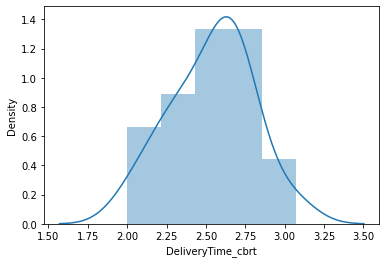

In [13]:
#cube_root Transformation   ---- normalise the data 
df_pd['DeliveryTime_cbrt']=np.cbrt(df_pd['DeliveryTime'])
print('After log transformation ,skewness is',df_pd['DeliveryTime_cbrt'].skew().round(3))
print('\n')
sns.distplot(df_pd['DeliveryTime_cbrt'])

After log transformation ,skewness is -0.025




<ipython-input-14-6597249e8218>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Variable)


<Axes: ylabel='Density'>

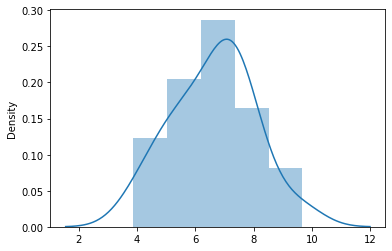

In [14]:
#Box cox transformation
DeliveryTime_BoxCox=stats.boxcox(df_pd['DeliveryTime'])[0]
Variable=pd.Series(DeliveryTime_BoxCox)
print('After log transformation ,skewness is',Variable.skew().round(3))
print('\n')
sns.distplot(Variable)

In [15]:
pd.DataFrame([df_pd['DeliveryTime'].skew(),df_pd['DeliveryTime_Log'].skew(),
              df_pd['DeliveryTime_Sqrt'].skew(),
              df_pd['DeliveryTime_cbrt'].skew(),Variable.skew()],
             index=['Normal','Log','Square Root','Cube Root','Box Cox'],
             columns =["Skewness"])

,Skewness
Normal,0.352390
Log,-0.451290
Square Root,-0.061811
Cube Root,-0.194336
Box Cox,-0.025017


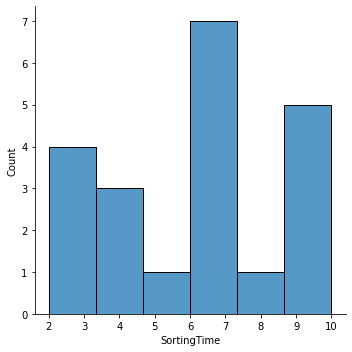

In [28]:
sns.displot(dataset['SortingTime'])
plt.show()

Fitting a Linear Regression Model

In [29]:
import statsmodels.formula.api as smf
model = smf.ols("DeliveryTime~SortingTime",data = dataset).fit()

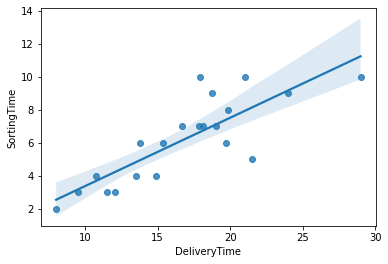

In [18]:
sns.regplot(x="DeliveryTime", y="SortingTime", data=dataset);

In [30]:
#Coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [31]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [32]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [33]:
#Predict for 3 and 5 daily circulation
newdata=pd.Series([3,5])
newdata

0    3
1    5
dtype: int64

In [34]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [35]:
model.predict(data_pred)

0    11.529794
1    14.827833
dtype: float64